## 1.Importing the dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Data Loading and Understanding

In [55]:
#Load the csv data to a pandas dataframe
df = pd.read_csv(r'..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.shape

(7043, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df = df.convert_dtypes()  # Converts object columns to string dtype automatically

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


In [61]:
# printing the unique values in all the columns ,make sure categorial column are categorical 
for col in df.columns:
    print(col,df[col].unique())
    print(""*50)

customerID <StringArray>
['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
 '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
 ...
 '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
 '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7043, dtype: string

gender <StringArray>
['Female', 'Male']
Length: 2, dtype: string

SeniorCitizen <IntegerArray>
[0, 1]
Length: 2, dtype: Int64

Partner <StringArray>
['Yes', 'No']
Length: 2, dtype: string

Dependents <StringArray>
['No', 'Yes']
Length: 2, dtype: string

tenure <IntegerArray>
[ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12,
 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,  9,  3, 31, 50,
 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41,  6,  4, 33, 67,
 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26,  0, 39]
Length: 73, dtype: Int64

PhoneService <StringArray>
['No', 'Yes']
Length: 2, dtype: 

In [62]:
# dropping customer id as it is not required for modelling 
df = df.drop(columns = ["customerID"])

In [63]:
numerical_feature_list = ["tenure","MonthlyCharges","TotalCharges"]
categorical_feature_list = []
for col in df.columns:
    if col not in numerical_feature_list:
        categorical_feature_list.append(col)


In [64]:
print(categorical_feature_list)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [65]:
# df["TotalCharges"] = df["TotalCharges"].astype(float)
len(df[df["TotalCharges"]==' '])

11

In [66]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   string 
 1   SeniorCitizen     7043 non-null   Int64  
 2   Partner           7043 non-null   string 
 3   Dependents        7043 non-null   string 
 4   tenure            7043 non-null   Int64  
 5   PhoneService      7043 non-null   string 
 6   MultipleLines     7043 non-null   string 
 7   InternetService   7043 non-null   string 
 8   OnlineSecurity    7043 non-null   string 
 9   OnlineBackup      7043 non-null   string 
 10  DeviceProtection  7043 non-null   string 
 11  TechSupport       7043 non-null   string 
 12  StreamingTV       7043 non-null   string 
 13  StreamingMovies   7043 non-null   string 
 14  Contract          7043 non-null   string 
 15  PaperlessBilling  7043 non-null   string 
 16  PaymentMethod     7043 non-null   string 


In [68]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### **Insights:**
1.Customer ID removed as it is not required for modelling
2.No missing values in the dataset
3.Missing values in the Totalcharges column were replaced with 0
4.class imbalance identified in the target


## 3.Exploratory Analysis

In [69]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
# only works for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.0,0.0,18.25,0.000000
25%,0.0,9.0,35.5,398.550000
50%,0.0,29.0,70.35,1394.550000
75%,0.0,55.0,89.85,3786.600000
max,1.0,72.0,118.75,8684.800000


#### **Numerical Features Analysis**

In [71]:
numerical_feature_list

['tenure', 'MonthlyCharges', 'TotalCharges']

Histogram

In [72]:
def plot_histogram(df,column_name):
    plt.figure(figsize =(5,3)) #how large the figure should be
    sns.histplot(df[column_name],kde = True)
    plt.title(f"Distribution of {column_name}")

    # calculate the mean and median values for the columns 
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # add verticals lines for mean and median 
    plt.axvline(col_mean,color ="red",linestyle ="--",label ="Mean")
    plt.axvline(col_median,color = "green",linestyle = "-",label = "Median")

    plt.legend()
    plt.show()


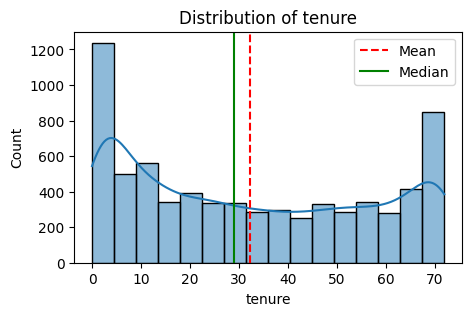

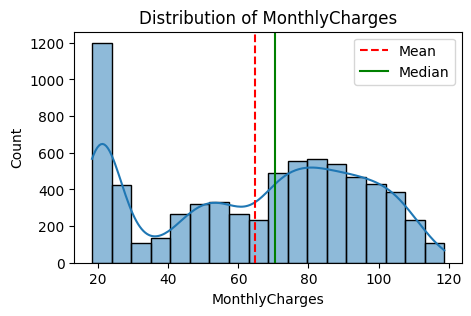

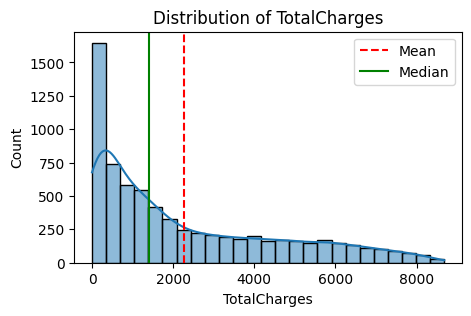

In [73]:
for feature in numerical_feature_list:
    plot_histogram(df,feature)

Box Plot

In [74]:
def plot_boxplot(df,column_name):
    plt.figure(figsize =(5,3)) #how large the figure should be
    sns.boxplot(df[column_name])
    plt.title(f"Box plot  of {column_name}")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

C:\Users\narma\AppData\Local\Temp\ipykernel_27448\3123800841.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


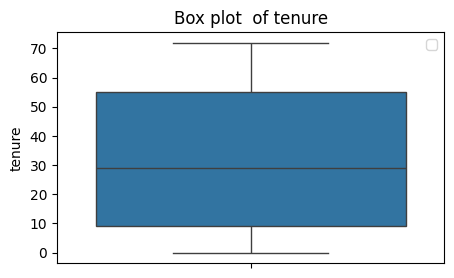

C:\Users\narma\AppData\Local\Temp\ipykernel_27448\3123800841.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


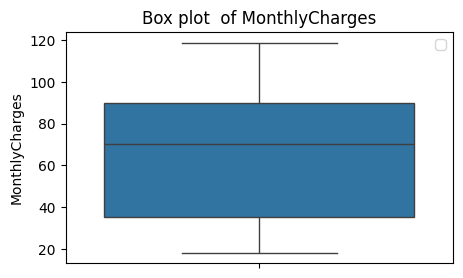

C:\Users\narma\AppData\Local\Temp\ipykernel_27448\3123800841.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


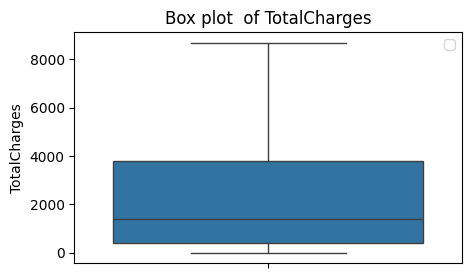

In [75]:
for feature in numerical_feature_list:
    plot_boxplot(df,feature)

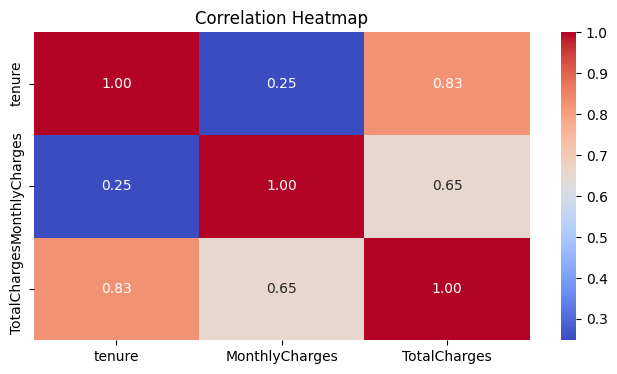

In [76]:
#Correlation Heatmap for Numerical Columns
plt.figure(figsize = (8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot = True,cmap ="coolwarm",fmt =".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insights:**
Tenure is highly correlated with TotalCharges, which makes sense because longer-tenured customers naturally pay more over time.

#### **Categorical Features Analysis**

In [77]:
print(categorical_feature_list)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Count Plot

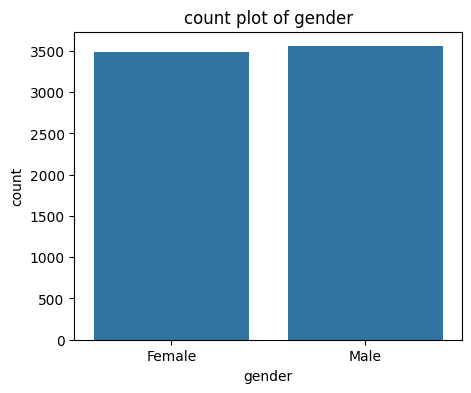

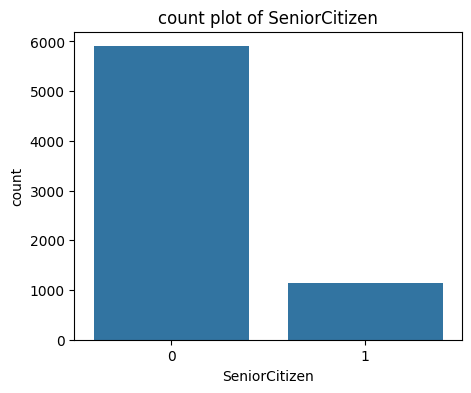

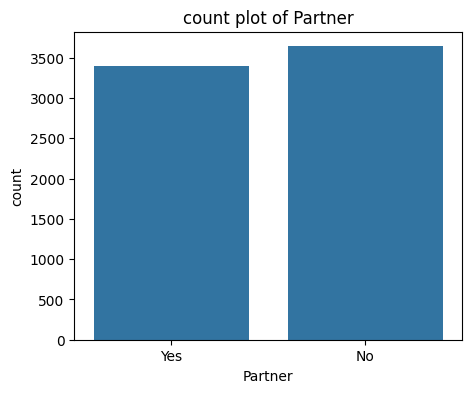

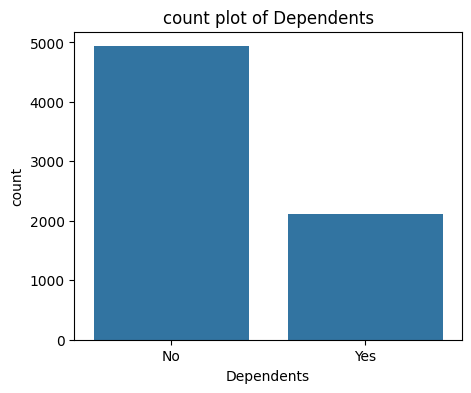

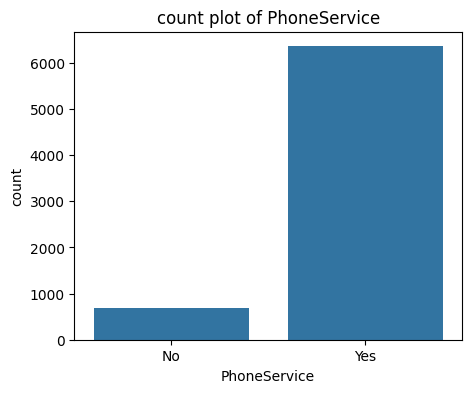

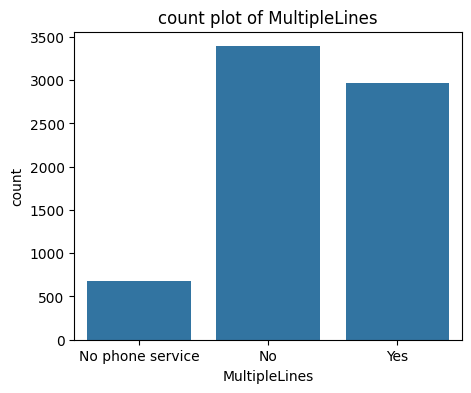

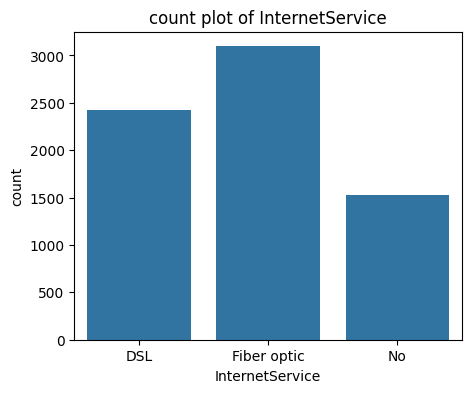

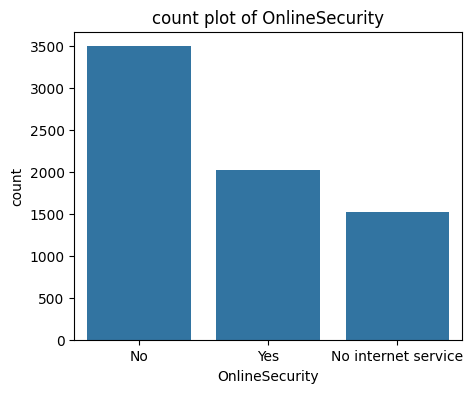

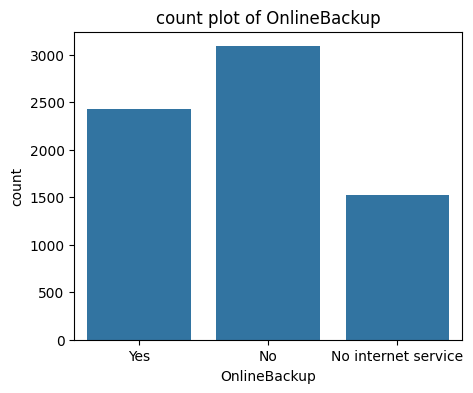

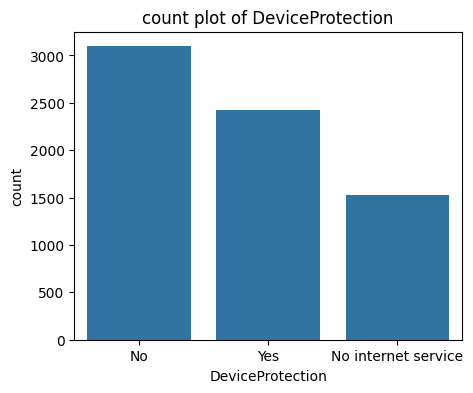

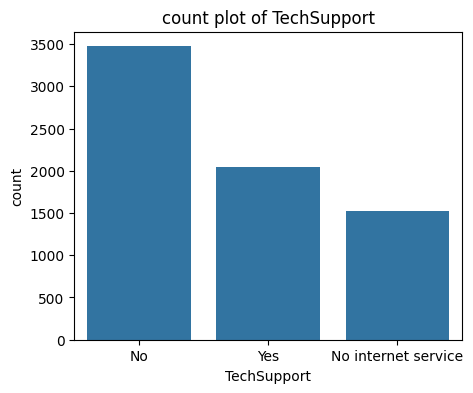

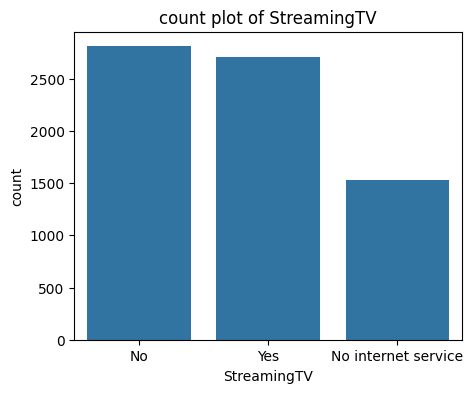

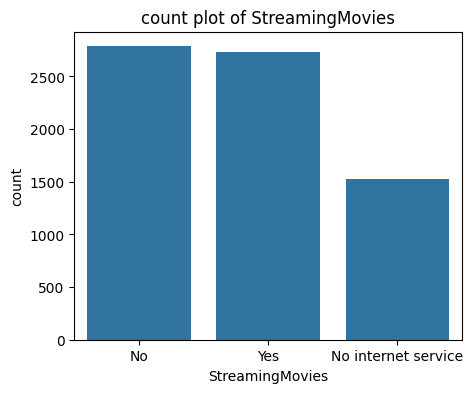

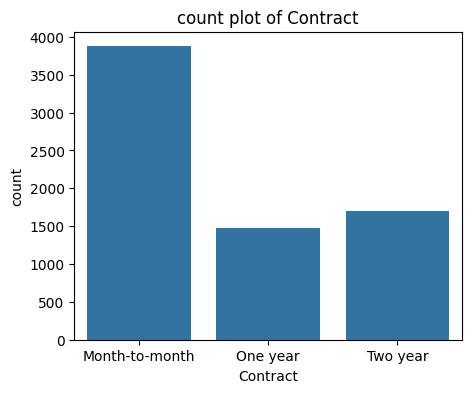

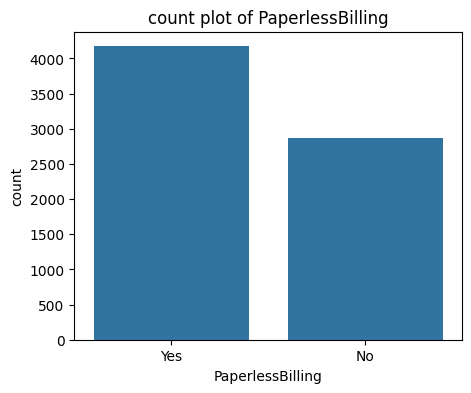

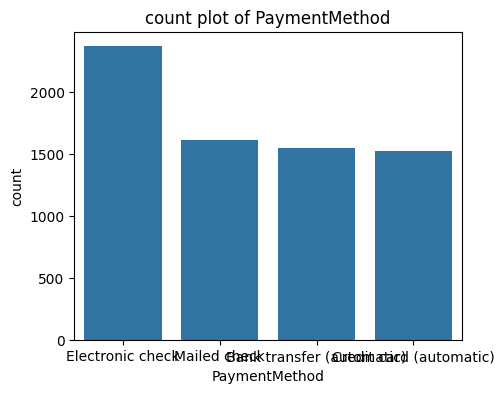

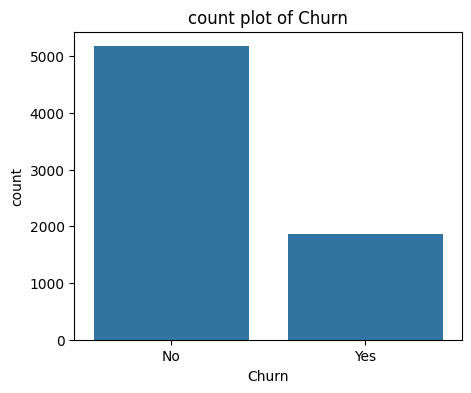

In [78]:
for col in categorical_feature_list:
    plt.figure(figsize= (5,4))
    sns.countplot(x = df[col])
    plt.title(f"count plot of {col}")
    plt.show()

**Insights**
Fewer customers churned compared to those who stayed, indicating class imbalance

In [80]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.60,Yes


In [81]:
df.to_csv(r"../data/processed.csv", index=False)  # Save to parent folder's data directory